# Trabajo Práctico 1: Técnicas de Diseño
El presente trabajo busca evaluar el desarrollo y análisis de algoritmos de las primeras técnicas de diseño vistas en la materia.
La primera fecha de entrega del TP será el 01/05/23, mientras que la segunda fecha de entrega (con reducción de nota) será
el 12/05/23.

## Primera Parte: Problema de K-merge por División y Conquista
### Introducción
El problema de K-merge es el siguiente: se tienen K arreglos ordenados, y se quiere quiere obtener un único arreglo, también
ordenado, con todos los elementos de los arreglos originales (inclusive si hay repetidos). Por simplicidad para los diferentes
análisis se puede suponer que todos los arreglos tienen exactamente h elementos (por ende, la cantidad total de elementos es
n = K ∗ h).
Para resolver este problema, es posible que hayan visto en Algoritmos y Programación II un algoritmo que resuelve este
problema utilizando un Heap. Nos referiremos a este como el algoritmo que utiliza Heaps.
La idea en este caso será plantear otra solución y analizarla. Se propone el siguiente algoritmo por división y conquista, con
semejanzas a mergesort.
1. Caso base: cuando quede un único arreglo, simplemente devolver dicho arreglo.
2. En el caso general, dividir la cantidad de arreglos entre la primera mitad, y la segunda mitad, y luego invocar
recursivamente para cada mitad de arreglos. Es decir, si tenemos cuatro arreglos, invocamos para los primeros 2, y
luego para los segundos 2. Al terminar los llamados recursivos, tenemos dos arreglos ordenados. Estos deberán ser
intercalados ordenadamente, tal cual se realiza en mergesort.


### Consigna
1. Determinar, utilizando el Teorema Maestro, cuál sería la complejidad del algoritmo propuesto.
2. Describir el algoritmo que utiliza heaps, y determinar su complejidad.
3. Implementar ambos algoritmos, y hacer mediciones (y gráficos) que permitan entender si las complejidades obtenidas
para cada uno se condicen con la realidad.
4. En caso que la complejidad obtenida en el punto 1 no se condiga con la realidad, indicar por qué (qué condición falla).
En dicho caso, se requiere llegar a la complejidad correcta (no solamente enunciarla, sino demostrar cuál es).
5. Indicar cualquier conclusión adicional que les parezca relevante en base a lo analizado.

1. Determinar, utilizando el Teorema Maestro, cuál sería la complejidad del algoritmo propuesto.

El Teorema Maestro tiene la siguiente fórmula: 

T(n) = AT(n/B) + f(n)

Donde:

A -> cantidad de llamadas recursivas (con A natural)

B -> proporción del tamaño original con el que llamamos recursivamente (con B real mayor a 1 y cte)

f(n) -> costo del trabajo que hacemos en cada llamada recursiva

En este caso tenemos:
$$
\newline
A = 2
\newline
B = 2
\newline
f(n) = O(n^C)\; donde\; C = 1
\newline
log_B(A) = log_2(2) = 1 \rightarrow como\;  log_B(A) = C \rightarrow  O(n^c * log(n)) = O(n log(n))
$$
Siendo n = K ∗ h, con K la cantidad de arreglos y h la cantidad de elementos de cada arreglo.

2. Describir el algoritmo que utiliza heaps, y determinar su complejidad.

El algoritmo que utiliza heaps es el siguiente:

    1. Agregar a un heap el primer elemento de cada uno de los arrays junto con su índice y el índice del array al que pertenece.

    2. Mientras que el heap no esté vacío:
    
       a. Tomar el primer elemento del heap y agregar el valor al resultado.

       b. Si el índice del elemento tomado es menor al tamaño del array al que pertenece, agregar el siguiente elemento del array al heap junto con su índice y el índice del array al que pertenece.

    3. Devolver el resultado.

1 -> O(K)
2 -> K * h veces
  a -> O(log(K))
  b -> O(log(K))

O(K) + K * h * O(log(K)) -> O(K + K * h * log(K))
K << K * h * log(K), entonces se desprecia K y queda O(K * h * log(K))


Siendo K la cantidad de arreglos y h la cantidad de elementos de cada arreglo.

3. Implementar ambos algoritmos, y hacer mediciones (y gráficos) que permitan entender si las complejidades obtenidas
para cada uno se condicen con la realidad.

In [12]:
PRINT = False

In [13]:
from heapq import heappush, heappop

def heap_mergeK_sorted(arrays):
    result = []
    heap = []

    for i in range(len(arrays)):
        heappush(heap, (arrays[i][0], i, 0))
    
    while heap:
        if PRINT:
            print(f"El resultado parcial es: {result}")
            print(f"Los elementos en el heap son: {heap}")
        value, array_index, value_index = heappop(heap)
        result.append(value)
        if value_index + 1 < len(arrays[array_index]):
            heappush(heap, (arrays[array_index][value_index + 1], array_index, value_index + 1))
        
    return result


arrays = [
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
]

result = heap_mergeK_sorted(arrays)
print(f"Lista ordenada: {result}")
print(f"¿Está ordenada?: {result == sorted(result)}")

Lista ordenada: [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28]
¿Está ordenada?: True


In [14]:
def merge(left_array, right_array):
    result = []
    
    i = 0
    j = 0
    while i < len(left_array) and j < len(right_array):
        if left_array[i] < right_array[j]:
            result.append(left_array[i])
            i += 1
        else:
            result.append(right_array[j])
            j += 1
    
    if i < len(left_array):
        result.extend(left_array[i:])
    if j < len(right_array):
        result.extend(right_array[j:])
    return result
     
def _dyc_mergeK_sorted(arrays, start, end):
    if start == end:
        return arrays[start]
        
    mid = (start + end) // 2
    left = _dyc_mergeK_sorted(arrays, start, mid)
    right = _dyc_mergeK_sorted(arrays, mid + 1, end)
    if PRINT:
        print(f"Voy a mergear:")
        print(f"-> izquierda: {left}")
        print(f"-> derecha: {right}")
    return merge(left, right)


def dyc_mergeK_sorted(arrays):
    return _dyc_mergeK_sorted(arrs, 0, len(arrs) - 1)

arrs = [
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
]

result = dyc_mergeK_sorted(arrs)
print(f"Lista ordenada: {result}")
print(f"¿Está ordenada?: {result == sorted(result)}")


Lista ordenada: [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28]
¿Está ordenada?: True


In [15]:
!pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import random
from time import time
from matplotlib import pyplot as plt

def generate_arrays(k, h):
    arrays = []
    for _ in range(k):
        array = []
        for _ in range(h):
            array.append(random.randint(0, k*h))
        array.sort()
        arrays.append(array)
    return arrays

In [25]:
merge_times = {}
for k in range(1, 1500):
    arrays = generate_arrays(k, k)
    start = time()
    heap_mergeK_sorted(arrays)
    end = time()
    merge_times[k*k] = end - start

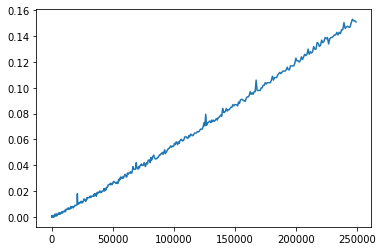

In [ ]:
plt.plot(merge_times.keys(), merge_times.values())
plt.show()

In [26]:
merge_times = {}
for k in range(1, 1500):
    arrays = generate_arrays(k, k)
    start = time()
    dyc_mergeK_sorted(arrays)
    end = time()
    merge_times[k*k] = end - start

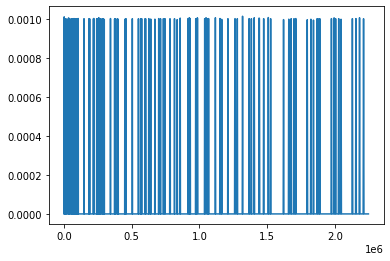

In [27]:
plt.plot(merge_times.keys(), merge_times.values())
plt.show()

## Segunda Parte: ¡Problema de contrabando!
#### Historia y Estado de la situación
Genovia y Krakozhia son países limítrofes muy disímiles. Entre sus muchas diferencias, se encuentran los productos que se
pueden producir o ingresar a uno y otro país. En particular, Krakozhia pertenece a la Unión Europea, haciendo que sea muy
restrictiva con algunas clases de productos1
.

Por el contrario, el Reino de Genovia casi no tiene restricciones ni en el acceso ni en la producción de productos. Este es uno
de los problemas que tienen con sus vecinos de la Unión Europea (el otro, es ser considerando un paraíso fiscal).
Es muy común que ciudadanos de Krakozhia viajen a Genovia, y aprovechen su estadía para comprar productos que no
podrían comprar en su país. Incluso hay quienes aprovechan para comprar bastantes productos, para luego revenderlos
en Krakozhia, a un alto precio. ¿El problema? es ilegal entrar con esos productos a la Unión Europea, y en particular a
Krakozhia, por lo que sus agentes aduaneros deberían confiscarles los productos (y potencialmente labrarles un acta o algún
otro tipo de sansión). ¿Lo bueno? Los agentes aduaneros de Krakozhia no destacan por su honestidad. El menos corrupto no
puede armar una declaración jurada de ingresos medianamente creíble. Esto quiere decir que al pasar por la aduana, un
agente aduanero puede pedir, en concepto de soborno, una cierta cantidad de algunos productos que se lleve consigo (luego de
revisarlos), el cual debe pagarse sí o sí, si no se quiere caer en serios problemas.
Planteo del problema
Queremos pasar mercadería de contrabando de Genovia a Krakozhia. La mercadería viene en paquetes que no podemos abrir.
Cada paquete i trae Xi unidades de un determinado tipo de producto j. Podríamos llegar a tener varios paquetes del mismo
tipo de producto j, incluso con diferente cantidad de unidades. También podemos tener diferentes paquetes de diferentes
productos. Es decir, cada paquete (in-abrible) es de una cantidad específica de un tipo específico, y en total para un tipo
específico j tenemos la suma de Xi unidades, para todos los i que sean de ese tipo.
Para nuestro ejemplo, supongamos que tenemos un paquete que trae 8 cajetillas de cigarrillos sabor arándano. Otro paquete
trae 5 cajetillas de lo mismos cigarrillos. Otro paquete puede traer 5 botellitas de 100ml de vodka radioactivo, etc. . .
Al pasar por la aduana, el corrupto funcionario puede indicarnos que “por acá no pasan sin dejarme al menos 6 cajetillas de
cigarrillos de arándano”.
Ante la imposibilidad de abrir y/o separar los paquetes, es claro que en dicho caso nos conviene dejar el paquete de 8 (no
podemos abrirlo para sacar 6 de allí. . . sino la movida sería muy evidente). Si el oficial hubiera dicho que hay que dejar
al menos 10 cajetillas, habría sido necesario dejar ambos paquetes para un total de 13 unidades de dicho producto. Si este
hubiera dicho que le dejemos una cajetilla de cigarrillos y una botellita de vodka, tendríamos que dejar el paquete de 5
botellitas de vodka y el paquete de 5 cajetillas de cigarrillos.

#### Consigna
1. Describir e implementar un algoritmo greedy que, dado un input con los productos que se tienen, y lo pedido como
soborno, nos permita salir airosos de la situación, con la mayor cantidad de productos posibles. Justificar por qué el
algoritmo es, efectivamente, greedy. Considerar que siempre se nos pedirá una cantidad de productos en existencias (en
nuestro ejemplo anterior, no nos habrían pedido que dejemos 7 botellas de vodka radioactivo, ni tampoco mandarinas
del Sahara).
2. Con las mismas consideraciones que en el punto anterior, describir e implementar un algoritmo (que sea óptimo) que
resuelva el problema utilizando programación dinámica.
3. Indicar y justificar la complejidad de ambos algoritmos propuestos. Indicar casos (características y ejemplos) de
deficiencias en el algoritmo greedy propuesto, para los cuales este no obtenga una solución óptima.
4. Implementar un programa que utilice ambos algoritmos, realizar mediciones y presentar resultados comparativos de
ambas soluciones, en lo que refiere a su optimalidad de la solución (no de su complejidad). Incluir en la entrega del tp
los sets de datos utilizados para estas simulaciones (que deben estar explicados en el informe). Estos deben incluir al
menos una prueba de volumen, indicando cómo es que fueron generadas.
#### Consideraciones adicionales
La nota del trabajo práctico tendrá en cuenta tanto la presentación y calidad de lo presentado, como también el desarrollo del
trabajo. No será lo mismo un trabajo realizado con lo mínimo indispensable, que uno bien presentado, analizado, y probado
con diferentes volúmenes, set de datos, o estrategias de generación de sets, en el caso que corresponda.